# Importing lib

In [2]:
import pandas as pd
import numpy as np
import random
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [48]:
with open('stock_infor.pkl', 'rb') as f:
  stock_infor = pickle.load(f)
with open('stock_price_v1.pkl', 'rb') as f:
  stock_price_v1 = pickle.load(f)

In [ ]:
stock_info = stock_infor[2]['data']

# Single Analysis

In [8]:
TICKET = 'MBB'

In [47]:
def select_data_stock(ticket):
    df = pd.DataFrame([], columns=['date', 'open', 'high', 'low', 'close', 'volume'])

    for company in stock_price_v1:
        if company['name'] == ticket:
            for data in company['data']:
                df.loc[len(df)] = data
            return df

    return df

In [40]:
df = select_data_stock("ACB")

### Data insights

In [41]:
tmp_df = df[df.date >= '2021-07-01']

In [42]:
tmp_df

,date,open,close,low,high,volume
1696,2021-07-01,35.55,36.2,35.10,35.95,10393200.0
1697,2021-07-02,36.30,36.4,36.00,36.10,6748800.0
1698,2021-07-05,36.30,38.1,35.90,37.95,18492100.0
1699,2021-07-06,38.00,38.2,36.00,36.00,10230700.0
1700,2021-07-07,36.00,36.9,35.10,36.55,10121600.0
...,...,...,...,...,...,...
1808,2021-12-08,32.65,33.4,32.55,33.10,4533200.0
1809,2021-12-09,33.00,33.3,32.80,33.30,2796900.0
1810,2021-12-10,33.20,33.6,33.10,33.40,5383407.0
1811,2021-12-13,33.55,33.8,33.30,33.40,3149115.0


###  Univariate distribution of features

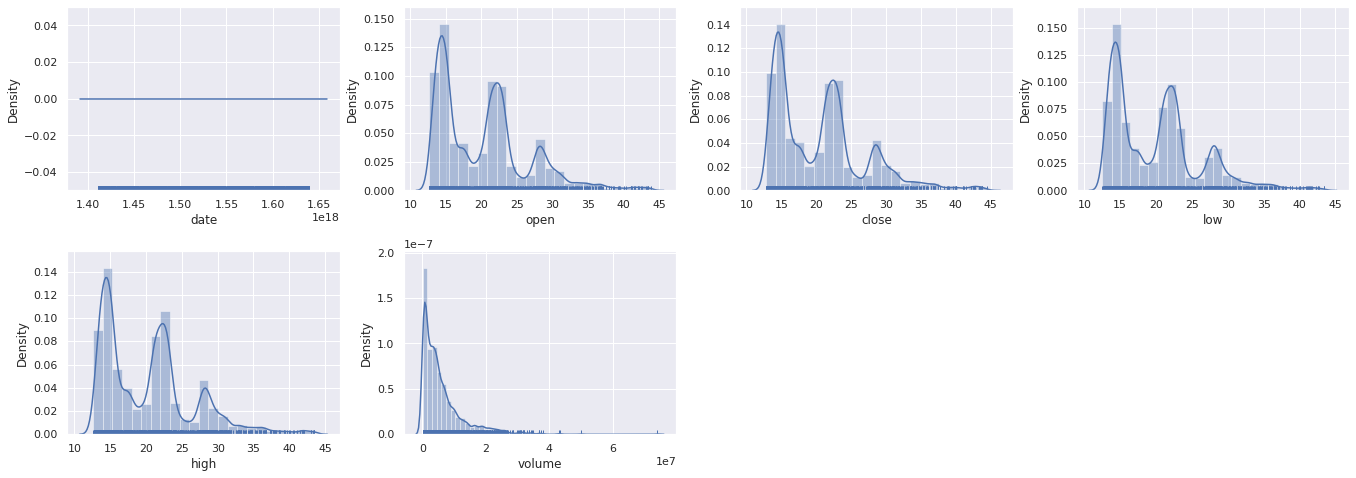

In [ ]:
fig = plt.figure(figsize = (19,30))
sns.set(style = 'darkgrid')

for i in range(len(df.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(df.iloc[:,i].dropna(), rug = True, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(df.columns[i])
    
plt.tight_layout()

### Bivariate analysis using scatter plot

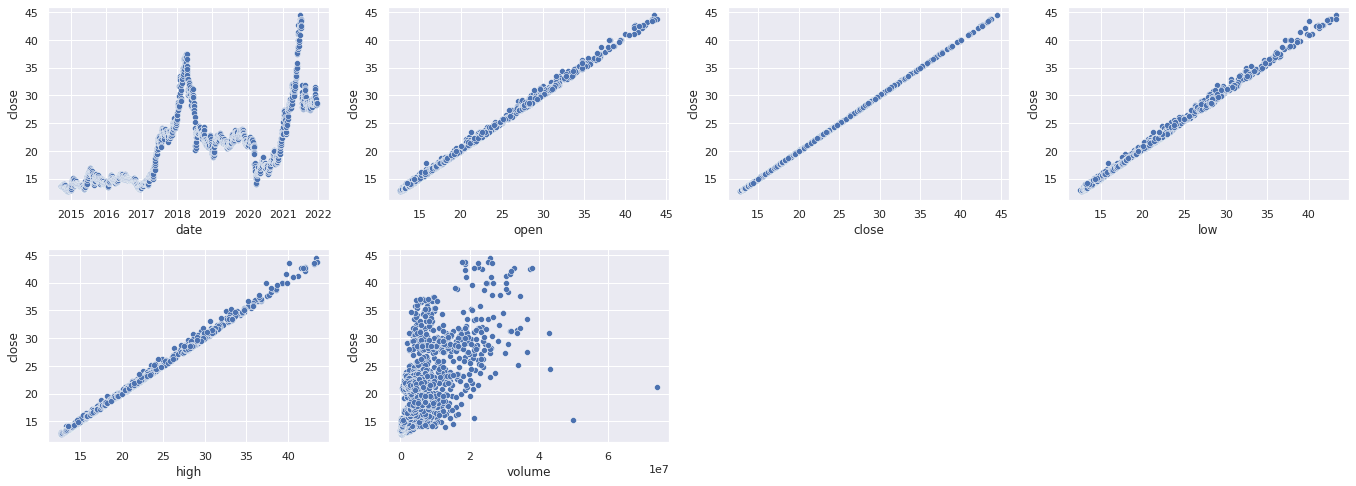

In [ ]:
fig = plt.figure(figsize = (19,30))
sns.set(style = 'darkgrid')

for i in range(len(df.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(df.iloc[:,i].dropna(), df['close'])

plt.tight_layout()

### Removing outliers

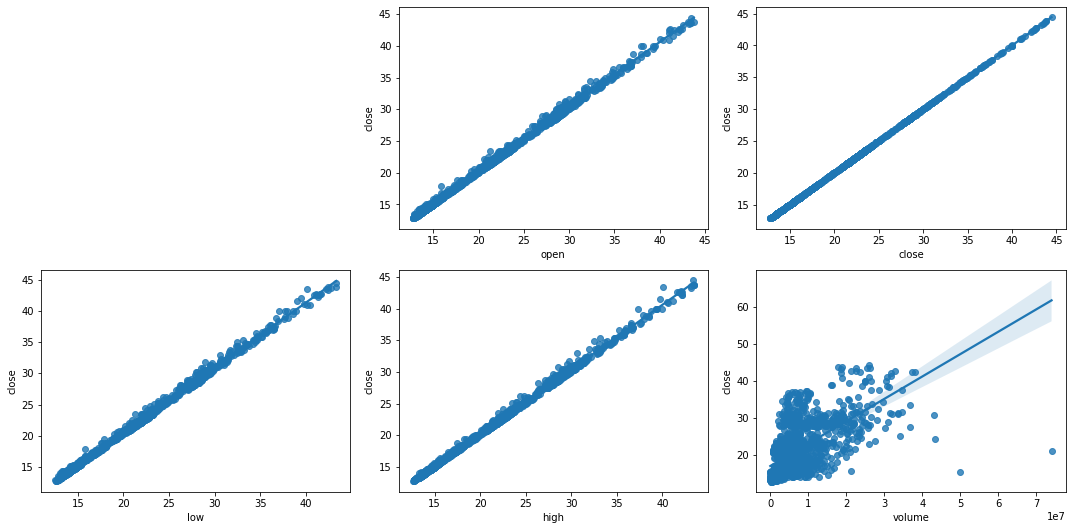

In [12]:
fig = plt.figure(figsize = (15,18))

for i in range(1, len(df.columns)):
    fig.add_subplot(5, 3, i+1)
    sns.regplot(df.iloc[:, i], df['close'])

plt.tight_layout()

### Dropping unnecessary features

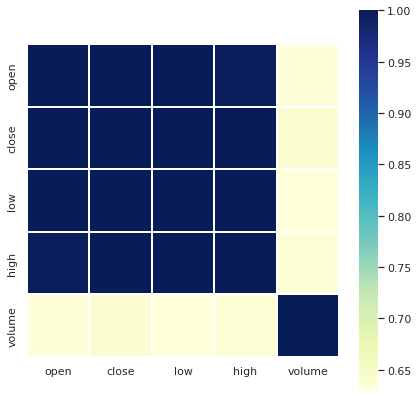

In [ ]:
plt.subplots(figsize=(7, 7))

sns.heatmap(df.corr(), cmap="YlGnBu", square=True, linewidths=1, annot=False)

plt.show()

### Trend show

No handles with labels found to put in legend.


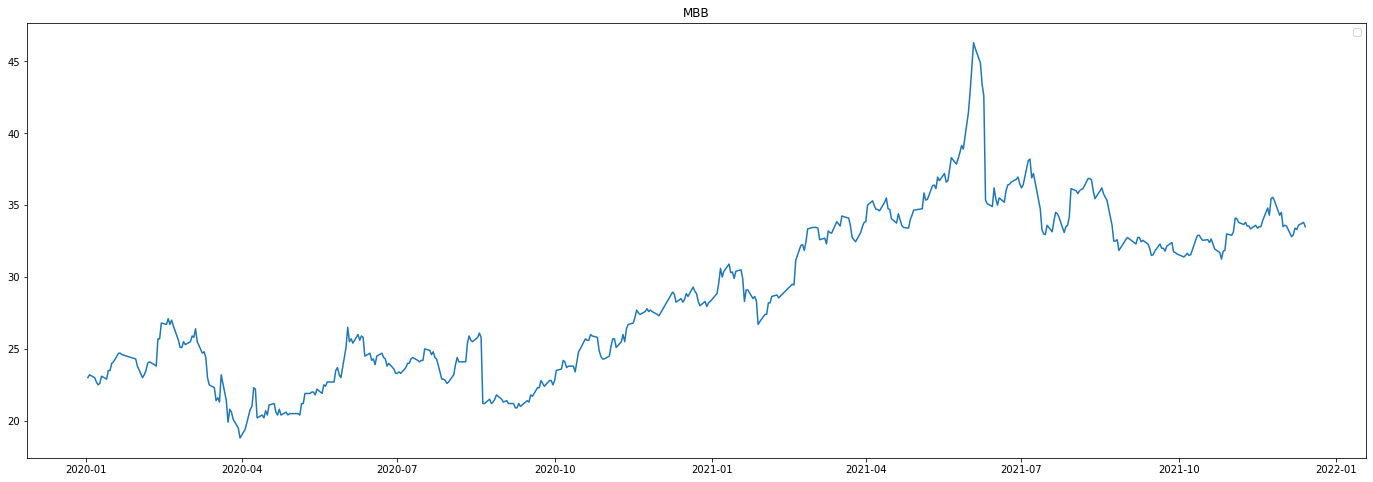

In [44]:
plt.figure(figsize = (24,8))

tmp_df = df[df.date >= '2020-01-01']
plt.plot(tmp_df['date'], tmp_df['close'])

plt.title(TICKET)
plt.legend()
plt.show()

In [90]:
list_com = stock_infor[0]["data"]

In [93]:
df_stock_info = pd.DataFrame(list_com, columns=['name'])

In [94]:
df_stock_info

,name
0,KSV
1,SAV
2,FIT
3,KCE
4,DL1
...,...
801,ABT
802,TIX
803,ASM
804,NAB


In [54]:
# cổ mà giá trong ngày không đổi 
list_com_not_change = []
for com in list_com:
    df = select_data_stock(com)
    tmp_df = df[df.date >= '2021-07-01']
    numday_not_change = 0
    for index, row in tmp_df.iterrows():
        if row['high']== row['low']:
            numday_not_change= numday_not_change+1
            # print(com,",on",row.date," ", row['high']," ", row['low'])
        
        if numday_not_change ==4: 
            list_com_not_change.append(com)
            break

print(list_com_not_change)


['KCE', 'EAD', 'SSC', 'ARM', 'HRT', 'PGD', 'GSM', 'VSP', 'CNN', 'VLF', 'DNY', 'CJC', 'BHT', 'CCP', 'DPP', 'NSG', 'DHB', 'VC9', 'APP', 'ICC', 'SMA', 'VE9', 'VIE', 'DRL', 'MIC', 'DPC', 'VST', 'YBC', 'BRR', 'ND2', 'CMI', 'VCF', 'LCC', 'G20', 'NTB', 'PGI', 'CDR', 'TPH', 'CMV', 'SAP', 'TCR', 'TDB', 'DP2', 'PSW', 'CMP', 'SBA', 'WSB', 'HTC', 'HAT', 'GVT', 'SCC', 'CMT', 'VOS', 'VLA', 'NCS', 'SVC', 'FDC', 'GTT', 'C92', 'QCC', 'DCS', 'BHC', 'LAI', 'BTG', 'ICF', 'QTC', 'CI5', 'HJS', 'ECI', 'HBD', 'PWS', 'HDM', 'SGC', 'VNL', 'AMC', 'VNF', 'EFI', 'IFS', 'PTI', 'PBP', 'WCS', 'MDC', 'SFG', 'DXL', 'TST', 'TTS', 'SPA', 'HEV', 'HPT', 'ANT', 'UPC', 'SSG', 'NAV', 'UNI', 'SGD', 'HOT', 'S4A', 'EBS', 'VAF', 'CMW', 'OPC', 'PJC', 'IDI', 'DNL', 'VTL', 'CCI', 'VIR', 'KHB', 'VHL', 'ST8', 'HCC', 'HLY', 'ACM', 'QHD', 'VBG', 'NDC', 'KSD', 'KHD', 'GTD', 'DTK', 'RGC', 'TNP', 'VES', 'NET', 'VMD', 'SVI', 'MVB', 'HNF', 'CAN', 'ATA', 'SDX', 'PRC', 'VKC', 'DNH', 'KHW', 'LGC', 'PMC', 'VC1', 'NAS', 'PDC', 'BMJ', 'BTT', 'CMS'

In [55]:
len(list_com_not_change)

458

In [87]:
df_viz = select_data_stock("HRT")
df_viz = df_viz[df_viz.date >= '2021-07-01']

df_viz[df_viz['high']== df_viz['low']].iloc[-1].count()

6

In [96]:
df_viz[df_viz['high']== df_viz['low']].shape[0]

11

In [110]:
from tqdm import tqdm

for name in tqdm(list_com):
    df_viz = select_data_stock(name)
    df_viz = df_viz[df_viz.date >= '2021-09-01']
    
    df_stock_info.loc[df_stock_info.name==name,"h=l"]=df_viz[df_viz['high']== df_viz['low']].shape[0]
    df_stock_info.loc[df_stock_info.name==name,"vol=0"]=df_viz[df_viz['volume']==0].shape[0]

100%|██████████| 806/806 [46:49<00:00,  3.49s/it] 


In [111]:
df_stock_info

,name,count,h=l,vol=0
0,KSV,3.0,1.0,0.0
1,SAV,1.0,0.0,0.0
2,FIT,0.0,0.0,0.0
3,KCE,110.0,66.0,39.0
4,DL1,0.0,0.0,0.0
...,...,...,...,...
801,ABT,NaN,22.0,7.0
802,TIX,NaN,3.0,1.0
803,ASM,NaN,0.0,0.0
804,NAB,NaN,0.0,0.0


Text(0.5, 0, 'num h=l')

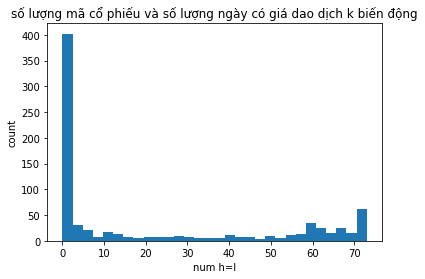

In [115]:
plt.hist(df_stock_info['h=l'], bins=30)  # density=False would make counts
plt.title("số lượng mã cổ phiếu và số lượng ngày có giá dao dịch k biến động")
plt.ylabel('count')
plt.xlabel('num h=l')

In [142]:
del df_stock_info['count']
df_stock_info

,name,h=l,vol=0
0,KSV,1.0,0.0
1,SAV,0.0,0.0
2,FIT,0.0,0.0
3,KCE,66.0,39.0
4,DL1,0.0,0.0
...,...,...,...
801,ABT,22.0,7.0
802,TIX,3.0,1.0
803,ASM,0.0,0.0
804,NAB,0.0,0.0


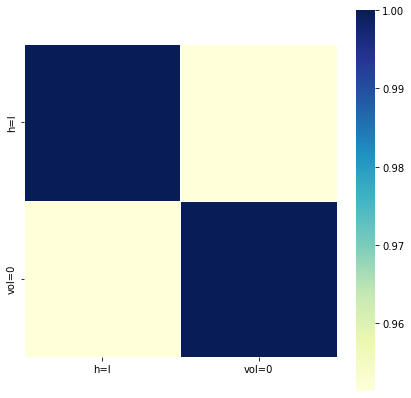

In [143]:
plt.subplots(figsize=(7, 7))

sns.heatmap(df_stock_info.corr(), cmap="YlGnBu", square=True, linewidths=1, annot=False)

plt.show()

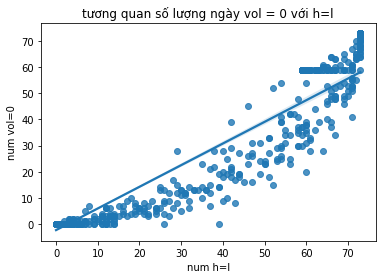

In [148]:
sns.regplot(df_stock_info['h=l'], df_stock_info['vol=0'])
plt.title("tương quan số lượng ngày vol = 0 với h=l")
plt.xlabel("num h=l")
plt.ylabel("num vol=0")

plt.show()

In [124]:
list_com_not_change_v2 = df_stock_info[df_stock_info['h=l']>=10]
len(list_com_not_change_v2)

346

In [120]:
list_com_not_change_v2 = list_com_not_change_v2["name"]

In [ ]:
def candlestick(t, o, h, l, c):
    plt.figure(figsize=(12,4))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.1, color=color)

for name in list_com_not_change_v2:
    df_viz = select_data_stock(name)
    df_viz = df_viz[df_viz.date >= '2021-07-01']
    candlestick(
        df_viz["date"],
        df_viz["open"],
        df_viz["high"],
        df_viz["low"],
        df_viz["close"]
    )

    plt.grid(alpha=0.2)  # lưới 
    plt.title(name)
    plt.show()

In [140]:
list_com_change = df_stock_info[df_stock_info['h=l']<10]
list_com_change # 460 co 
# list_com_change_and_low_vol = list_com_change[list_com_change['vol=0']]

,name,count,h=l,vol=0
0,KSV,3.0,1.0,0.0
1,SAV,1.0,0.0,0.0
2,FIT,0.0,0.0,0.0
4,DL1,0.0,0.0,0.0
6,LUT,0.0,0.0,0.0
...,...,...,...,...
800,MVY,NaN,0.0,0.0
802,TIX,NaN,3.0,1.0
803,ASM,NaN,0.0,0.0
804,NAB,NaN,0.0,0.0


Text(0.5, 0, 'num day vol = 0')

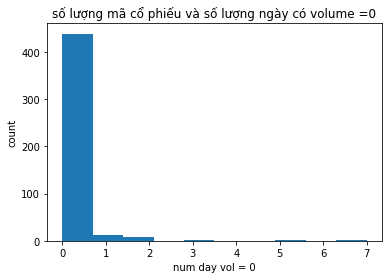

In [133]:
plt.hist(list_com_change['vol=0'], bins=10)  # density=False would make counts
plt.title("số lượng mã cổ phiếu và số lượng ngày có volume =0")
plt.ylabel('count')
plt.xlabel('num day vol = 0')

In [137]:
list_com_change_and_vol_0  = list_com_change[list_com_change['vol=0']>0]['name']

In [138]:
len(list_com_change_and_vol_0)

22

In [170]:
list_name_com_change = list_com_change['name']
len(list_name_com_change)

460

In [173]:
df_stock_info_460 = pd.DataFrame(list_name_com_change, columns=['name'])

In [153]:
for name in tqdm(list_name_com_change):
    df_viz = select_data_stock(name)
    df_viz = df_viz[df_viz.date >= '2021-09-01']
    
    df_stock_info_460.loc[df_stock_info_460.name==name,"num high null"]=df_viz[df_viz['high']== 0].shape[0]
    df_stock_info_460.loc[df_stock_info_460.name==name,"num open null"]=df_viz[df_viz['open']== 0].shape[0]
    df_stock_info_460.loc[df_stock_info_460.name==name,"num close null"]=df_viz[df_viz['close']== 0].shape[0]
    df_stock_info_460.loc[df_stock_info_460.name==name,"num low null"]=df_viz[df_viz['low']== 0].shape[0]
    # df_stock_info_460.loc[df_stock_info_460.name==name,"vol=0"]=df_viz[df_viz['volume']==0].shape[0]

100%|██████████| 460/460 [27:53<00:00,  3.64s/it]


In [172]:
df_stock_info_460

,name
0,KSV
1,SAV
2,FIT
4,DL1
6,LUT
...,...
800,MVY
802,TIX
803,ASM
804,NAB


Text(0.5, 0, 'field')

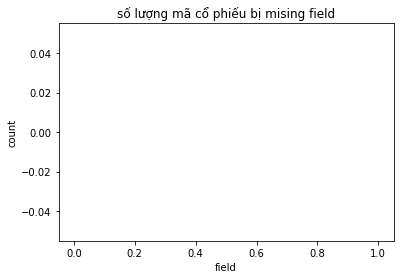

In [167]:
plt.hist(df_stock_info_460[df_stock_info_460['num high null']>0][['num high null']],)  # density=False would make counts
plt.title("số lượng mã cổ phiếu bị mising field")
plt.ylabel('count')
plt.xlabel('field')

In [168]:
del df_stock_info_460['name']
(df_stock_info_460 != 0).sum(axis=0)

num high null     0
num open null     0
num close null    0
num low null      0
dtype: int64

In [ ]:
def candlestick(t, o, h, l, c):
    plt.figure(figsize=(12,4))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.1, color=color)

for name in list_com_change_and_vol_0:
    df_viz = select_data_stock(name)
    df_viz = df_viz[df_viz.date >= '2021-07-01']
    candlestick(
        df_viz["date"],
        df_viz["open"],
        df_viz["high"],
        df_viz["low"],
        df_viz["close"]
    )

    plt.grid(alpha=0.2)  # lưới 
    plt.title(name)
    plt.show()

In [ ]:
# cổ mà giá trong ngày không đổi 
list_com_and = []
for com in list_com:
    df = select_data_stock(com)
    tmp_df = df[df.date >= '2021-07-01']
    numday_not_change = 0
    for index, row in tmp_df.iterrows():
        if row['high']== row['low']:
            numday_not_change= numday_not_change+1
            # print(com,",on",row.date," ", row['high']," ", row['low'])
        
        if numday_not_change ==4: 
            list_com_not_change.append(com)
            break

print(list_com_not_change)

In [ ]:
def candlestick(t, o, h, l, c):
    plt.figure(figsize=(12,4))
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.1, color=color)

for name in list_com_not_change:
    df_viz = select_data_stock(name)
    df_viz = df_viz[df_viz.date >= '2021-07-01']
    candlestick(
        df_viz["date"],
        df_viz["open"],
        df_viz["high"],
        df_viz["low"],
        df_viz["close"]
    )

    plt.grid(alpha=0.2)  # lưới 
    plt.title(name)
    plt.show()


In [58]:
list_com_change=[]
for com in list_com:
    if com not in list_com_not_change:
        list_com_change.append(com)


In [176]:
len(list_com_change)

460

In [ ]:
list_com_low_vol = []
for com in list_com_change:
    df = select_data_stock(com)
    tmp_df = df[df.date >= '2021-07-01']
    numday_vol_none = 0
    for index, row in tmp_df.iterrows():
        if row['volume']== 0:
            numday_vol_none= numday_vol_none+1
            # print(com,",on",row.date," ", row['high']," ", row['low'])
        
        if numday_not_change ==4: 
            print(com)
            list_com_low_vol.append(com)
            break

In [65]:
print(list_com_low_vol)

['KSV', 'SAV', 'FIT', 'DL1', 'LUT', 'VIC', 'FTS', 'BRC', 'TSC', 'EIB', 'DST', 'PSI', 'BVH', 'SMC', 'VNE', 'SGT', 'DLG', 'DHG', 'HU4', 'NVB', 'PLC', 'TMS', 'NLG', 'VPH', 'CTC', 'CDN', 'RDP', 'TVN', 'PFL', 'TDM', 'TTF', 'TDN', 'GDT', 'BID', 'PHP', 'TTZ', 'VNB', 'CMG', 'BHN', 'C47', 'LCG', 'VNM', 'FID', 'VCR', 'VCG', 'TC6', 'PGC', 'NHA', 'TNA', 'TV2', 'PDR', 'CSC', 'TIS', 'DHT', 'BVS', 'NTP', 'L18', 'PAC', 'VOC', 'VBB', 'VIS', 'PNJ', 'NTL', 'BFC', 'DMC', 'STB', 'CTG', 'KSB', 'HII', 'DHM', 'KLB', 'ITC', 'HDC', 'FPT', 'NT2', 'TNG', 'SBS', 'PPC', 'MHC', 'TNS', 'VCB', 'UDC', 'TVB', 'SHN', 'VNG', 'SRB', 'TTN', 'AMV', 'PVB', 'CII', 'IJC', 'NBC', 'ITD', 'UIC', 'VCS', 'HTI', 'OCH', 'DC4', 'DPM', 'SGR', 'NKG', 'THT', 'BMI', 'VEF', 'DIG', 'DXG', 'QNS', 'PMB', 'TCT', 'HNG', 'KDH', 'SLS', 'MST', 'DGW', 'LGL', 'MSN', 'DBD', 'POM', 'QCG', 'SCL', 'TCM', 'MBS', 'HHG', 'HAP', 'TCL', 'VNP', 'QTP', 'BCC', 'LAS', 'CAP', 'VTO', 'DPR', 'VDS', 'DSN', 'ABC', 'NVL', 'PVG', 'SGP', 'NNC', 'CCL', 'WSS', 'VIP', 'KBC'

In [66]:
len(list_com_low_vol)

346

In [ ]:
for com in list_com:
    df = select_data_stock(com)
    tmp_df = df[df.date >= '2020-01-01']
    close_day_before= tmp_df["close"].iloc[0]
    for index, row in tmp_df.iterrows():
        close_today = row['close']
        if close_today /close_day_before < 0.85:
            print(com,",on",row.date,",today=",close_today,",before=",close_day_before)
            break

        close_day_before = close_today

In [ ]:
df = select_data_stock(com)

# Group Analysis

In [ ]:
for group in stock_info.keys():
    print(group)

BDS
CAOSU
CK
CONGNGHE
DICHVU
DVCI
DUOCPHAM
GIAODUC
HK
KHOANGSAN
NANGLUONG
NGANHANG
THEP
DAUKHI
NHUA
PHANBON
SXKD
THUCPHAM
THUONGMAI
THUYSAN
VANTAI
VLXD
XAYDUNG
DTPT
DTXD


In [ ]:
stock_info

In [201]:
GROUP_NAME = 'NANGLUONG'

In [216]:
pd_survey = list_com_change['name']
pd_survey.reset_index(drop=True, inplace=True)
list_com_after = pd_survey.to_list()
print(list_com_after)

['KSV', 'SAV', 'FIT', 'DL1', 'LUT', 'VIC', 'FTS', 'BRC', 'TSC', 'HRT', 'PGD', 'EIB', 'DST', 'PSI', 'BVH', 'SMC', 'VNE', 'SGT', 'DLG', 'DHG', 'HU4', 'NVB', 'PLC', 'VC9', 'TMS', 'APP', 'NLG', 'VE9', 'VPH', 'CTC', 'CDN', 'RDP', 'TVN', 'BRR', 'PFL', 'TDM', 'TTF', 'TDN', 'PGI', 'GDT', 'BID', 'PHP', 'TTZ', 'VNB', 'CMG', 'BHN', 'C47', 'TCR', 'LCG', 'VNM', 'PSW', 'FID', 'VCR', 'SBA', 'WSB', 'VCG', 'TC6', 'PGC', 'CMT', 'VOS', 'NCS', 'NHA', 'C92', 'TNA', 'TV2', 'PDR', 'CSC', 'TIS', 'DHT', 'BVS', 'NTP', 'L18', 'PAC', 'VOC', 'VBB', 'VIS', 'PNJ', 'VNL', 'NTL', 'VNF', 'BFC', 'DMC', 'MDC', 'SFG', 'STB', 'CTG', 'KSB', 'HII', 'DHM', 'KLB', 'ANT', 'ITC', 'HDC', 'FPT', 'NT2', 'TNG', 'SBS', 'PPC', 'MHC', 'TNS', 'OPC', 'VCB', 'UDC', 'TVB', 'KHB', 'SHN', 'VNG', 'HCC', 'SRB', 'TTN', 'AMV', 'PVB', 'CII', 'IJC', 'NBC', 'KSD', 'KHD', 'ITD', 'RGC', 'UIC', 'VCS', 'HTI', 'OCH', 'DC4', 'DPM', 'SGR', 'MVB', 'NKG', 'THT', 'BMI', 'VEF', 'DIG', 'DXG', 'QNS', 'VC1', 'PMB', 'TCT', 'HNG', 'KDH', 'SLS', 'MST', 'DGW', 'LGL'

In [185]:
def select_data_stock_by_group(group_name):
    df = pd.DataFrame([], columns=['date', 'close', 'adjust', 'company'])  # (close-open / open)  

    for ticket in tqdm(random.sample(stock_info[group_name], 3)):
        for company in stock_price_v1:
            if company['name'] == ticket:
                for data in company['data']:
                    df.loc[len(df)] = [data[0], data[2], ticket]
                break

    return df

In [ ]:
[date, com, close, 60 cột ]

In [208]:
def select_data_stock_by_group(group_name):
    df = pd.DataFrame([], columns=['date', 'close', 'company'])

    for ticket in tqdm(random.sample(stock_info[group_name], 5)):
        for company in stock_price_v1:
            if company['name'] == ticket and ticket in pd_survey.values:
                for data in company['data']:
                    df.loc[len(df)] = [data[0], data[2], ticket]
                break

    return df

In [209]:
df_list = select_data_stock_by_group(GROUP_NAME)

100%|██████████| 5/5 [00:17<00:00,  3.42s/it]


### Data insights

In [189]:
df_list.head()

,date,close,company
0,2017-12-28,23.0,BAB
1,2017-12-29,25.0,BAB
2,2018-01-02,26.0,BAB
3,2018-01-03,26.0,BAB
4,2018-01-04,25.5,BAB


In [ ]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5438
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     5439 non-null   datetime64[ns]
 1   close    5439 non-null   float64       
 2   company  5439 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 170.0+ KB


### Trend show

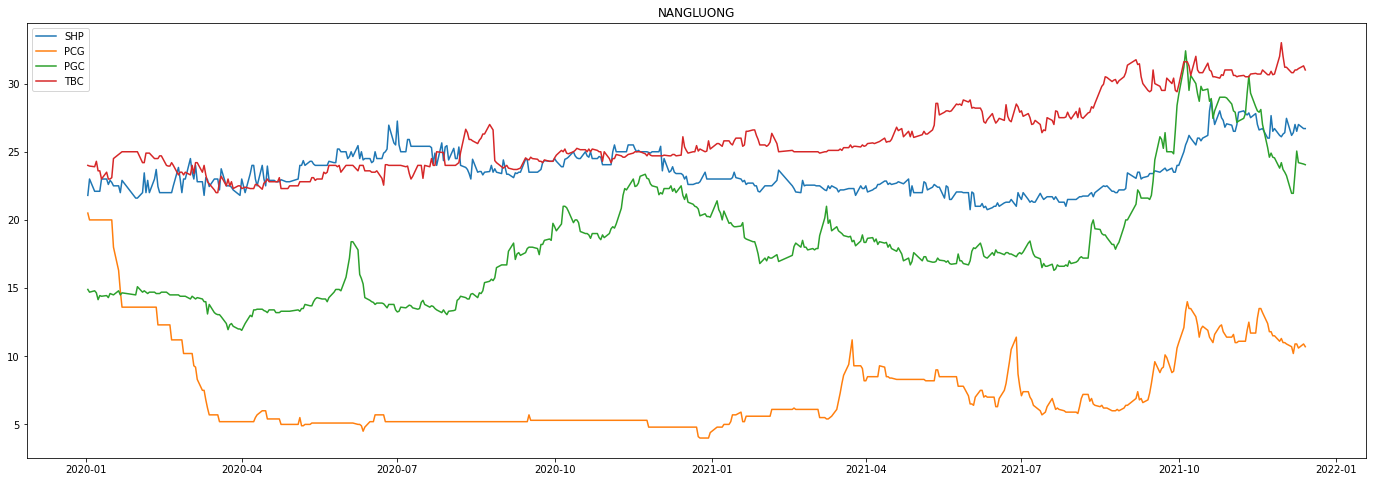

In [210]:
plt.figure(figsize = (24,8))

for ticket in df_list['company'].unique():
    tmp_df = df_list[(df_list.company == ticket) & (df_list.date >= '2020-01-01')]
    plt.plot(tmp_df['date'], tmp_df['close'], label = ticket)

plt.title(GROUP_NAME)
plt.legend()
plt.show()